<a href="https://colab.research.google.com/github/eunpro/self/blob/main/DL_bro_deepflow_necessary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처: 딥러닝호형 DL bro
https://youtu.be/NxNL8Xlj_Og


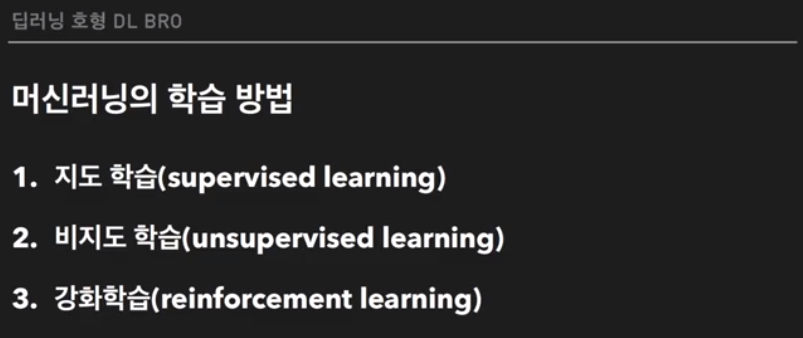

지도학습: 정답 알려주며 학습

비지도학습: 정답 알려주지 않은 채 학습

강화학습: 모델자체가 확률, 보상에 의해 스스로 계산

#[지도학습]

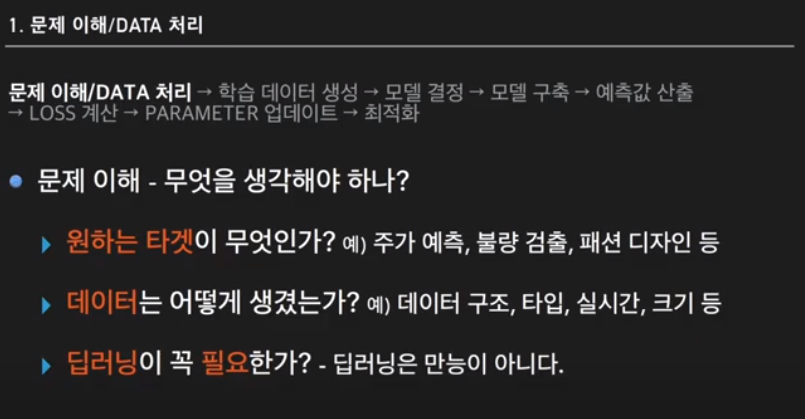

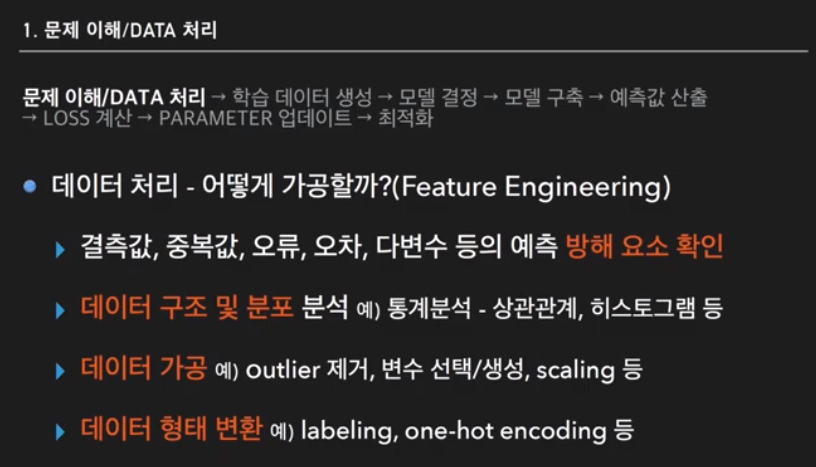

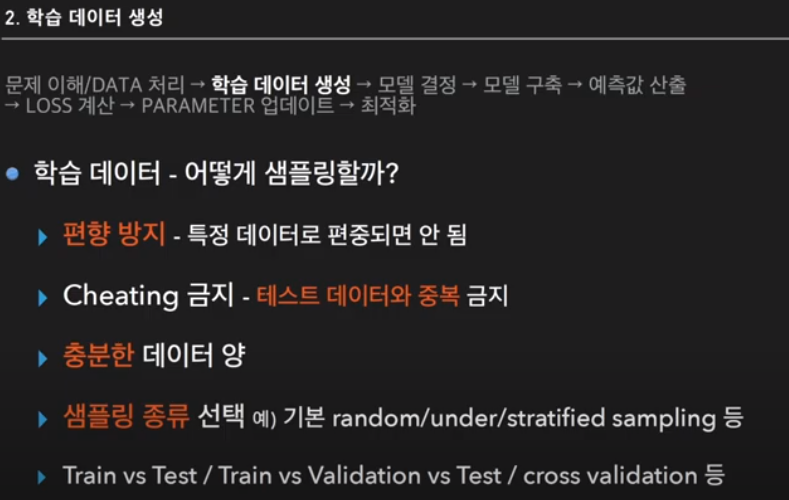

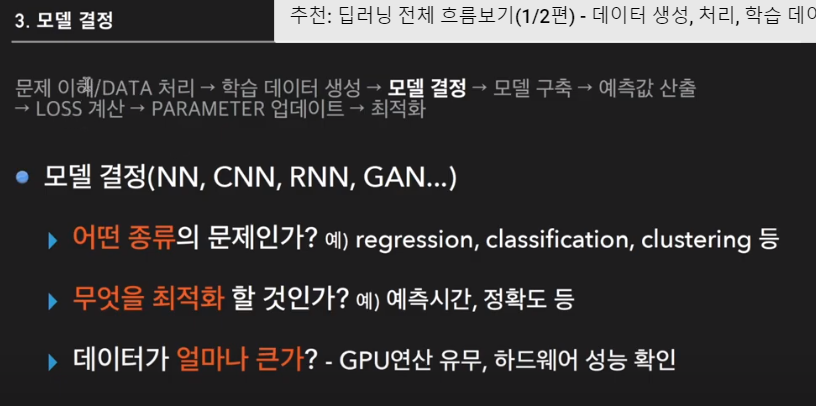

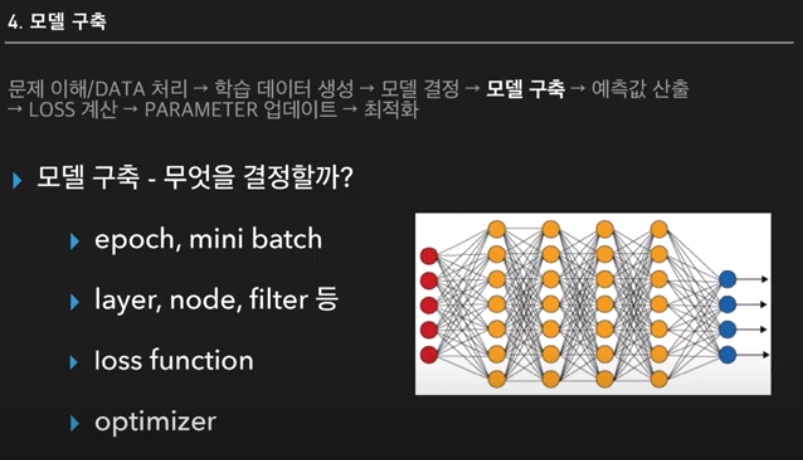

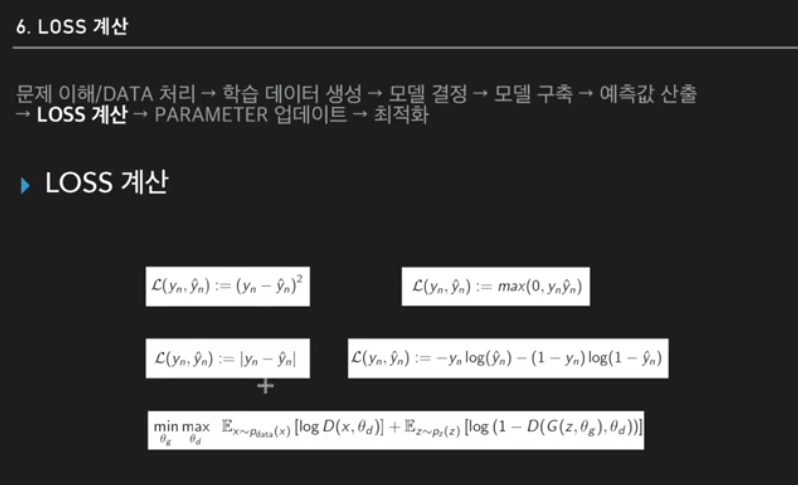

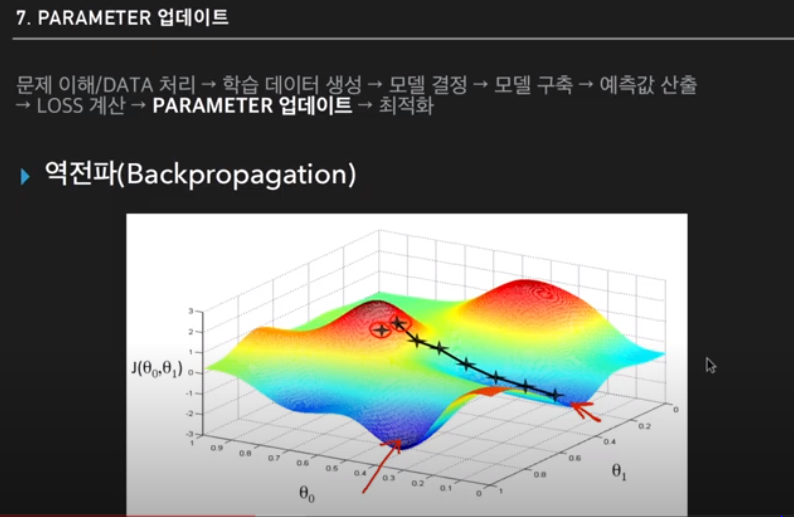

ㄴ미분통해 손실값이 작아지는 방향으로 찾아가게끔 해줌

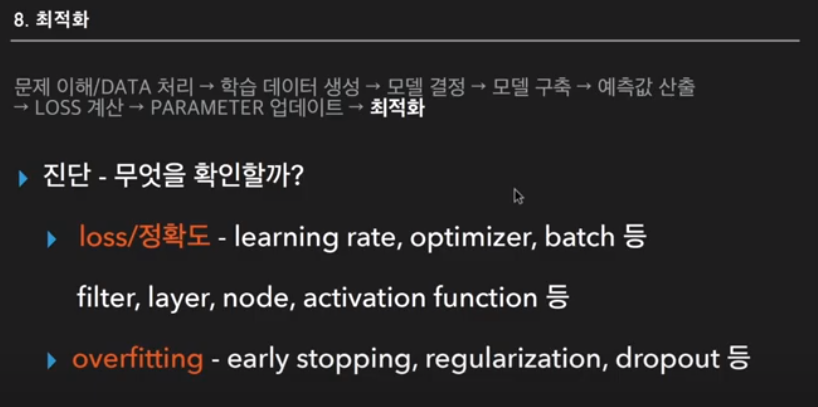

In [10]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt


def Generator(num):
  x_data = np.random.uniform(-100,100,num)
  y_data = 0.5 * x_data + 2 + np.random.normal(0,50, num)

  return x_data, y_data

Instructions for updating:
non-resource variables are not supported in the long term


In [11]:
def Split_data(x,y,prop):
  m = y.shape[0]
  shuffle_idx = np.random.permutation(m)
  x = x[shuffle_idx]
  y = y[shuffle_idx]

#p값을 기준으로 trian, test data 범위 구분
  p = int(m*prop)
  x_train = x[:p]
  y_train = y[:p]
  x_test = x[p:]
  y_test = y[p:]

  return x_train, y_train, x_test, y_test

In [12]:
if __name__ == '__main__':
  n=100
  x_data, y_data = Generator(n)

  #데이터 반반 나눔
  x_train, y_train, x_test, y_test = Split_data(x_data, y_data, 0.5)

  #Model parameters 변수
  W = tf.Variable([0.], tf.float32) #업데이트 되는 변수
  b = tf.Variable([0.], tf.float32)

  #Model input and output
  x = tf.placeholder(tf.float32) #liternal될 때마다 변환되는 변수
  y = tf.placeholder(tf.float32)

#예측layer
  hypothesis = tf.add(tf.multiply(W,x),b)

In [13]:
cost = tf.reduce_mean(tf.square(hypothesis - y))

optimizer = tf.train.GradientDescentOptimizer(1e-5)
train_op = optimizer.minimize(cost)

with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  
  feed_dict = {x:x_train, y:y_train}

  for i in range(101):
    session.run(train_op, feed_dict)
    if i% 10==0:
      print(i, "cost", cost.eval(feed_dict))

  print('Prediction')
  y_pred = session.run(hypothesis,{x:x_test})


0 cost 2936.541
10 cost 2530.6084
20 cost 2383.0308
30 cost 2329.3733
40 cost 2309.8591
50 cost 2302.7568
60 cost 2300.166
70 cost 2299.2163
80 cost 2298.8628
90 cost 2298.7256
100 cost 2298.6677
Prediction


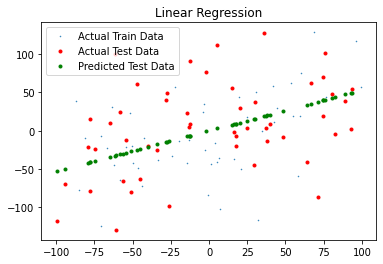

In [15]:
plt.plot(x_train, y_train,'.',markersize=1, label='Actual Train Data')
plt.plot(x_test, y_test,'.',color='red', label='Actual Test Data')
plt.plot(x_test, y_pred,'.',color='green', label='Predicted Test Data')
plt.legend()
plt.title('Linear Regression') #linear regression: 선형회귀
plt.show()

Regression: contious value를 예측(ex: 집 값, 온도)

Classification: discrete value를 예측(ex: 성별, 대출유무, 신용등급)

Numerical data: 정량적인 데이터

Categorical data: 그룹화 되어 있는 데이터

Categorical data를 숫자로 표현하는 방법

Labeling: 각 인덱스마다 고유 번호 부여

One-Hot encoding: 벡터화(희소벡터)하여 표현 => 0과 1만 사용

Sigmoid fuction: 0과 1사이의 결과값 표현을 얻기 위해 사용

  이진분류기에서 주로 사용됨

Softmax fuction: 모든 결과값의 합이 1

  다중분류기에서 주로 사용됨

Mean Square Error: regression에서 주로 사용

Cross Entropy Loss: 분류문제에서 많이 사용

Gradient Descent: 한 번 업데이트 시 전체 데이터만 활용

  모델 최적화에 가장 널리 사용되는 방법

  미분을 통해 loss값이 최소가 되게 하는 변수를 구하는 것이 목적

Stochastic Gradient Descent: 한 번 업데이트 시 일부 데이터만 활용


Training_error = 2

Validation_error = 10

=> overfitting: 학습데이터에 맞춰 변수업데이트가 되어 새로운 데이터에 대해 예측을 잘못하는 현상 = 트레이닝데이터는 잘 맞추지만 새로운 데이터는 잘 못 맞춤

오버피팅 해결 방법

1> regularization: 로스에 제약 조건 주어서 변수가 움직이는 범위를 한정


Accuracy: 정확도가 높을수록 좋은 모델은 아님

class 3개인 분류문제

  각 클래스의 accuracy까지 판단

좋은 모델인지 평가: loss, accuracy, precision, recall, AUC 등 다양한 평가 기준 있음

- Precision(정밀도): 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율

- Recall(재현율): 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율

- Accuracy(정확도)

-  F1 score: Precision과 Recall의 조화평균

#경사하강법
input -> 예측값 뽑아내는 모델 -> output


모델 성능 평가 지표

- loss function: 예측값과 실제값 차이 비교

loss function이 최소화 되게 하는 w구함 -> 적용 -> 다시 w구함 반복하며 최소값지점 구함 => 현재 위치에서 기울기가 커지는 곳으로 조금씩 옮겨감

learning_rate = mu: 얼마만큼 갈지 조정

w의 발산을 막기 위해 값을 조정하기 위해 사용, mu크게 잡으면 발산

w미분 >0 => 왼쪽 이동(-)

w미분 <0 => 오른쪽 이동(+)

- cost function:  
